# Creating Ligand Networks Exported from Orion or FEP+

OpenFE provides functions to load a ligand network from an [OpenEye Orion NES] `.dat` file or Schrödinger FEP+ `.edge` file. With this, we can create a network of transformations using their tools and then run the actual simulations with OpenFE.

[OpenEye Orion NES]: https://docs.eyesopen.com/floe/modules/oemdaffinity/docs/source/tutorials/NES_tutorial.html

## Load the ligands

Both FEP+ `.edge` and Orion `.dat` files identify molecules by name, so to load the network OpenFE requires a list of named ligands.

Load the ligands used by the network into instances of `SmallMoleculeComponent`. For more information, see [Loading Small Molecules]:

[Loading Small Molecules]: https://docs.openfree.energy/en/stable/cookbook/loading_molecules.html#loading-small-molecules

In [1]:
%matplotlib inline
from rdkit import Chem
import openfe

supplier = Chem.SDMolSupplier("assets/somebenzenes.sdf", removeHs=False)
ligands = [openfe.SmallMoleculeComponent(mol) for mol in supplier]

ligands

[SmallMoleculeComponent(name=benzene),
 SmallMoleculeComponent(name=toluene),
 SmallMoleculeComponent(name=phenol),
 SmallMoleculeComponent(name=benzonitrile),
 SmallMoleculeComponent(name=anisole),
 SmallMoleculeComponent(name=benzaldehyde),
 SmallMoleculeComponent(name=styrene)]

## Select an atom mapper

Both formats encode only the network itself, leaving mappings between atoms in each edge undefined. OpenFE needs an atom mapper to produce atom mappings; for more information, see [Choose an Atom Mapper]:

[Choose an Atom Mapper]: https://docs.openfree.energy/en/stable/cookbook/generate_ligand_network.html#Choose-an-atom-mapper

In [2]:
mapper = openfe.setup.LomapAtomMapper(
    threed=True, # Use atom positions to prune symmetric mappings
    max3d=1.0, # Forbid mapping between atoms more than 1.0 Å apart
    element_change=False, # Forbid mappings that change an atoms element
)

Then, create the `LigandNetwork` from the edges in the network file:

## Loading an FEP+ edges network
Here we show how to take an FEP+ edge network file, `assets/somebenzenes_fepp.edge` and load it into an LigandNetwork object.

In [3]:
from openfe.setup.ligand_network_planning import load_fepplus_network

ligand_network = load_fepplus_network(
    ligands=ligands,
    mapper=mapper,
    network_file="assets/somebenzenes_fepp.edge",
)

parallel map scoring


/Users/atravitz/micromamba/envs/openfe-notebooks/lib/python3.13/site-packages/gufe/components/explicitmoleculecomponent.py:74: UserWarning: RDKit does not preserve Mol properties when pickled by default, which may drop e.g. atom charges; consider setting `Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)`
  warnings.warn(
/Users/atravitz/micromamba/envs/openfe-notebooks/lib/python3.13/site-packages/gufe/components/explicitmoleculecomponent.py:74: UserWarning: RDKit does not preserve Mol properties when pickled by default, which may drop e.g. atom charges; consider setting `Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)`
  warnings.warn(


## Loading an Orion NES network file

Similarly we can take an Orion network edge file, `data/benzenes.dat` and load it into an LigandNetwork object.

In [4]:
from openfe.setup.ligand_network_planning import load_orion_network

ligand_network = load_orion_network(
    ligands=ligands,
    mapper=mapper,
    network_file="assets/somebenzenes_nes.dat",
)


parallel map scoring


/Users/atravitz/micromamba/envs/openfe-notebooks/lib/python3.13/site-packages/gufe/components/explicitmoleculecomponent.py:74: UserWarning: RDKit does not preserve Mol properties when pickled by default, which may drop e.g. atom charges; consider setting `Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)`
  warnings.warn(


## Visualizing the Network

Once defined we can visualise the network as we normally would.

For more ways to visualize a `LigandNetwork`, see [Visualizing Ligand Networks].

[Visualizing Ligand Networks]: https://docs.openfree.energy/en/stable/cookbook/ligandnetwork_vis.html

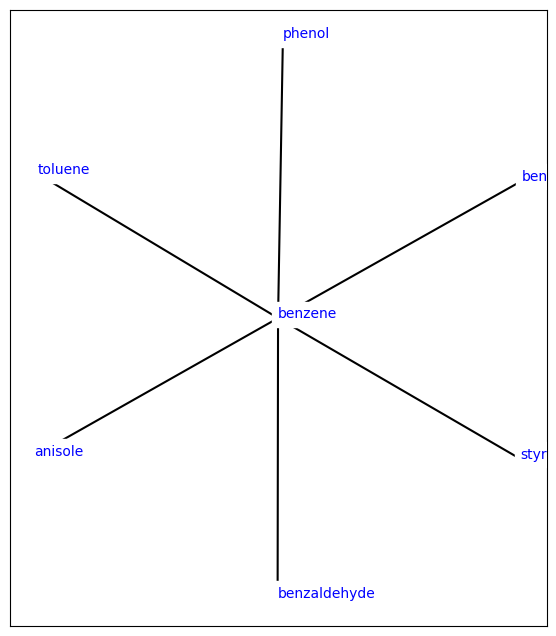

In [5]:
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(ligand_network)

In [6]:
## Similarly we can visualize the invidual mappings

from ipywidgets import interact, widgets

def display_edge(index):
    view = edges[index].view_3d(spheres=True, show_atomIDs=True)
    view.show()

# traverse through all views

edges = list(ligand_network.edges)

interact(display_edge, index=widgets.IntSlider(min=0, max=len(edges)-1, step=1));

interactive(children=(IntSlider(value=0, description='index', max=5), Output()), _dom_classes=('widget-interac…

## Creating an AlchemicalNetwork

See [Creating an Alchemical Network] for how to use these defined `ligand_network` objects to create an AlchemicalNetwork, which we can then be executed using the OpenFE CLI.

[Creating an Alchemical Network]: https://docs.openfree.energy/en/stable/cookbook/create_alchemical_network.html